# **Imports**

**Importamos las librerías necesarias**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

# **Custom Naive Bayes**

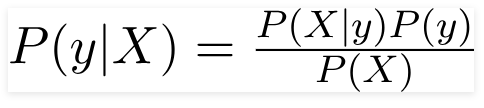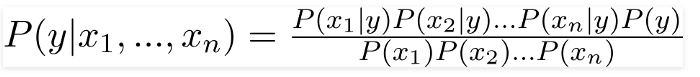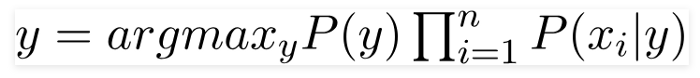

In [ ]:
class NaiveBayesClassifier():

    def fit(self, X, y):
        self.classes = np.unique(y)                         # Obtener clases o labels
        self.classes_n = y.value_counts()                   # Obtener la cantidad de clases
        self.rows = X.shape[0]                              # Obtener cantidad de registros del dataset
        self.prior_y = y.value_counts().divide(X.shape[0])  # Calculamos P(y)
        self.calc_prior_X(X)                                # Calculamos P(x_i)
        self.calc_likelihoods(X, y)                         # Calculamos P(x_i|y)
    
    def calc_likelihoods(self, X, y):
        self.likelihoods = []
        for c in self.classes:
            # Contaremos las veces que aparece cada categoría de x_i en una clase c 
            df_c = X[y==c]                                  
            likelihoods_c = []
            for col in df_c:
                likelihoods_c.append(df_c[col].value_counts().divide(self.classes_n[c]))
            self.likelihoods.append(likelihoods_c)

    def calc_prior_X(self, X):
        self.prior_X = []
        for col in X:
            self.prior_X.append(X[col].value_counts().divide(X.shape[0]))
    
    def calc_posterior(self, x):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = self.prior_y[c] # P(y)
            conditional = 1
            for x_i, l in enumerate(self.likelihoods[i]):
                base = pd.Series([1/self.rows], index=[x[x_i]])
                base = base.add(l, fill_value=0)
                conditional *= base[x[x_i]]
            posteriors.append(conditional * prior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        preds = [self.calc_posterior(x) for x in X.to_numpy()]
        return preds

# **Ejemplo PPT**

**Cargamos los datos**

In [ ]:
path = "car_stolen.csv"
df = pd.read_csv(path)
df

,Color,Type,Origin,Stolen
0,Red,Sports,Domestic,Yes
1,Red,Sports,Domestic,No
2,Red,Sports,Domestic,Yes
3,Yellow,Sports,Domestic,No
4,Yellow,Sports,Imported,Yes
5,Yellow,SUV,Imported,No
6,Yellow,SUV,Imported,Yes
7,Yellow,SUV,Domestic,No
8,Red,SUV,Imported,No
9,Red,Sports,Imported,Yes


**Construimos la matriz X y el vector y**

In [ ]:
features = ["Color", "Type", "Origin"]
target = "Stolen"

In [ ]:
X = df[features]
y = df[target]

In [ ]:
y.value_counts().divide(X.shape[0])

Yes    0.5
No     0.5
Name: Stolen, dtype: float64

**Instanciamos y fiteamos nuestro clasificador**

In [ ]:
nb = NaiveBayesClassifier()
nb.fit(X, y)

**Probamos nuestro clasificador con una instancia con características rojo, SUV y domestico**

In [ ]:
X_test = pd.DataFrame([["Red", "SUV", "Domestic"]])
X_test

,0,1,2
0,Red,SUV,Domestic


In [ ]:
nb.predict(X_test)

['No']

# **Ejemplo con mas datos**

**Contexto:** Se quiere evaluar autos según ciertas características. La evaluación puede ser, inaceptable, aceptable, buena y muy buena. Las características del set de datos son las siguientes:

Nombre | Descripción
--- | ---
`buying_price` | precio de compra
`maint` | precio de mantenimiento
`doors` | cantidad de puertas
`persons` | capacidad en cuanto a número de personas
`lug_boot` | tamaño de la maleta del auto
`safety` | seguridad estimada
`eval` | evaluación final


## **Pre-Procesamiento**

**Cargamos los datos**

In [ ]:
path = "car_data.csv"
df_car = pd.read_csv(path, header=None)

In [ ]:
df_car = df_car.rename(columns={0:'buying_price', 1:'maint', 2:'doors', 3:'persons', 4:'lug_boot', 5:'safety', 6:'eval'})
df_car.head()

,buying_price,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
len(df_car)

1728

**Transformamos los datos categóricos a numéricos**

In [ ]:
for col in ['buying_price', 'maint', 'doors', 'persons', 'lug_boot', 'safety']:
    df_car[col] = pd.Categorical(df_car[col]).codes

In [ ]:
df_car.head()

,buying_price,maint,doors,persons,lug_boot,safety,eval
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


## **Construcción matrices X y vectores y**

**Construimos matriz X y vector y**

In [ ]:
features = ['buying_price', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
target = 'eval'

In [ ]:
X = df_car[features]
y = df_car[target]

**Separamos en set de train y test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## **Predicción con Naive Bayes**

**Predicción con nuestro Naive Bayes**

In [ ]:
nb = NaiveBayesClassifier()
nb.fit(X_train, y_train)

In [ ]:
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.846820809248555

**Predicción con Naive Bayes de SKlearn**

In [ ]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB()

In [ ]:
clf_pred = clf.predict(X_test)
accuracy_score(y_test, clf_pred)

0.8439306358381503